In [229]:
# Here is a list of all the libraries that one might need to install for this project
!pip install SpeechRecognition
!pip install pyttsx3
!pip install playsound
!pip install gtts
!pip install speech_recognition
!pip install pycopy-webbrowser
!pip install duckduckgo-search
!pip install PyAudio
!pip install pillow

ERROR: Could not find a version that satisfies the requirement speech_recognition (from versions: none)
ERROR: No matching distribution found for speech_recognition
  Using cached pycopy-webbrowser-0.0.0.tar.gz (631 bytes)
ERROR: pycopy-webbrowser from https://files.pythonhosted.org/packages/40/6f/3534aa5470f69aede4ec969a4f64981892e5bd838ea8e148d8d7ee52f1bc/pycopy-webbrowser-0.0.0.tar.gz does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
  Using cached PyAudio-0.2.12.tar.gz (42 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for PyAudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [13 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      copying src/pyaudio.py -> build/

In [58]:
from skimage import io
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import requests
from bs4 import BeautifulSoup
from duckduckgo_search import ddg
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import speech_recognition as sr
recording = sr.Recognizer()
import webbrowser as web
import re
from gtts import gTTS
import os
from playsound import playsound
import pyttsx3
from duckduckgo_search import ddg_videos
from duckduckgo_search import ddg_images

In [68]:
recipe_query = input('enter recipe name: ')
servings_query = int(input('enter the number of person you want to cook the recipe for: '))

enter recipe name: gulab jamun
enter the number of person you want to cook the recipe for: 12


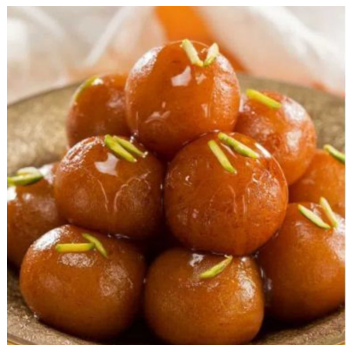

In [69]:
# Display the image of the dish you queried
try:
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    f = ddg_images(recipe_query)[0]['image']
    a = io.imread(f)
    plt.imshow(a)
    plt.axis('off')
    plt.show()
except:
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    f = ddg_images(recipe_query)[1]['image']
    a = io.imread(f)
    plt.imshow(a)
    plt.axis('off')
    plt.show()

In [70]:
# class to scrape the recipe form allrecipes.com

class recipe_parser:

    def __init__(self):
        self.units = ['centimeter', 'centimeters', 'centimetre', 'centimetres', 'cup','can','cups', 'fl oz', 'fluid ounce', 'fluid oz', 'g', 'gallon', 'gallons', 'gram', 'inch', 'inches', 'kg', 'kilogram', 'kilograms', 'liter', 'litre', 'mg', 'milligram', 'milliliter', 'millilitre', 'millimeter', 'millimeters', 'millimetre', 'millimetres', 'ounce', 'ounces', 'oz', 'pint', 'pints', 'pound', 'pounds', 'quart', 'quarts', 'tablespoon', 'tablespoons', 'tbsp', 'teaspoon', 'teaspoons', 'tsp']
        self.tools = ['pan', 'bowl', 'baster', 'saucepan', 'knife', 'oven', 'beanpot', 'chip pan', 'cookie sheet', 'cooking pot', 'crepe pan', 'double boiler', 'doufeu', 	
         'dutch oven', 'food processor', 'frying pan', 'skillet', 'griddle', 'karahi', 'kettle', 'pan', 'pressure cooker', 'ramekin', 'roasting pan', 
         'roasting rack', 'saucepansauciersaute pan', 'splayed saute pan', 'souffle dish', 'springform pan', 'stockpot', 'tajine', 'tube panwok', 	
         'wonder pot', 'pot', 'apple corer', 'apple cutter', 'baster', 'biscuit cutter', 'biscuit press', 'baking dish', 'bread knife', 'browning tray', 	
         'butter curler', 'cake and pie server', 'cheese knife', 'cheesecloth', 'knife', 'cherry pitter', 'chinoise', 'cleaver', 'corkscrew', 
         'cutting board', 'dough scraper', 'egg poacher', 'egg separator', 'egg slicer', 'egg timer', 'fillet knife', 'fish scaler', 'fish slice', 
         'flour sifter', 'food mill', 'funnel', 'garlic press', 'grapefruit knife', 'grater', 'gravy strainer', 'ladle', 'lame', 'lemon reamer', 
         'lemon squeezer', 'mandoline', 'mated colander pot', 'measuring cup', 'measuring spoon', 'grinder', 'tenderiser', 'thermometer', 'melon baller',
         'mortar and pestle', 'nutcracker', 'nutmeg grater', 'oven glove', 'blender', 'fryer', 'pastry bush', 'pastry wheel', 'peeler', 'pepper mill', 
         'pizza cutter', 'masher', 'potato ricer', 'pot-holder', 'rolling pin', 'salt shaker', 'sieve', 'spoon', 'fork', 'spatula', 'spider', 'tin opener',
         'tongs', 'whisk', 'wooden spoon', 'zester', 'microwave', 'cylinder', 'Aluminum foil', 'steamer', 'broiler rack', 'grate', 'shallow glass dish', 'wok', 
         'dish', 'broiler tray', 'slow cooker']
        self.attributes = dict()
        self.ingredients = []
        self.directions = []
        self.soup = ''
        self.ratio = ''
        self.transformed_directions = []
        self.transformed_ingredients = []
        self.nutrition = dict()
        self.direction_tools = dict()
        self.direction_ingre = dict()
        self.all_tools_used = []
    
    def get_recipe(self):
        # try:
        link = 'https://www.allrecipes.com/search?q='
        query = recipe_query.replace(" ", "-")
        find_recipe = requests.get(link+query)
        soup = BeautifulSoup(find_recipe.content, 'html.parser')
        s = soup.find('div', class_='comp search-results__content mntl-block')
        content = s.find_all('a')
        recipe_link = content[0].get('href')
        fetch_recipe = requests.get(recipe_link)
        self.soup = BeautifulSoup(fetch_recipe.content, 'html.parser')
        # except:
        #     print('Recipe not found, refer web instead: ')
        #     print(ddg(recipe_query)[0])
    
    def get_attributes(self):
        s = self.soup.find( 'div', class_="comp recipe-details mntl-recipe-details")
        lines = s.find_all('div')
        attributes_temp = lines[0].text.split('\n')
        attributes_raw = []
        for i in attributes_temp:
            if i!= '':
                attributes_raw.append(i[:-1].lower())
        for a in range(int(len(attributes_raw)/2)):
            b = 2*a
            self.attributes[attributes_raw[b]] = attributes_raw[b+1] 
        return (self.attributes)

    def scale_factor(self):
        self.ratio = servings_query/int(self.attributes['servings'])
        return (self.ratio)

    def get_ingredients(self):
        s = self.soup.find( 'div', class_='comp mntl-structured-ingredients')
        lines = s.find_all('span')
        ingredients_raw = []
        for line in lines:
            ingredients_raw.append(line.text)
        for a in range(int(len(ingredients_raw)/3)):
            b = 3*a
            self.ingredients.append(ingredients_raw[b:b+3])
        ratios = {'½':'0.5', '⅓':'0.33', '⅔':'0.66', '¼':'0.25', '¾':'0.75', '⅕':'0.2', '⅖':'0.4', '⅗':'0.6', '⅘':'0.8', '⅙':'0.16', '⅚':'0.83', '⅛':'0.125'}
        for i in self.ingredients:
            if i[0] in ratios.keys():
                i[0] = ratios[i[0]]
            elif len(i[0]) == 3:
                if i[0].split()[1] in ratios.keys():
                    i[0] = i[0].split()[0] + ratios[i[0].split()[1]]
        return (self.ingredients)

    def get_directions(self):
        s = self.soup.find( 'ol', class_="comp mntl-sc-block-group--OL mntl-sc-block mntl-sc-block-startgroup")
        lines = s.find_all('li')
        directions_raw = []
        for line in lines:
            directions_raw.append(line.text.split('.'))
        for i in directions_raw:
            for d in i:
                if d.strip()!='':
                    self.directions.append(d.strip())
        return (self.directions)

    def scaled_directions(self):
        local_ratio = {'1/2':'.5', '1/4':'.25', '3/4':'.75', '1/3':'.33', '2/3':'.66', '1/5':'.2', '2/5':'.4', '4/5':'.8', '1/6':'.16', '5/6': '.83', '1/8':'.125', '½':'.5', '⅓':'.33', '⅔':'.66', '¼':'.25', '¾':'.75', '⅕':'.2', '⅖':'.4', '⅗':'.6', '⅘':'.8', '⅙':'.16', '⅚':'.83', '⅛':'.125' }
        local_numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
        # transformed_directions = []
        for step in self.directions:
            s = step.split()
            for u in self.units:
                for a in s:
                    if u == a:
                        x = s.index(a)
                        if s[x-1] in local_ratio.keys():
                            if s[x-2] in local_numbers:
                                z = float(s[x-2]+local_ratio[s[x-1]])
                                s[x-1] = round(z*rcp.ratio,2)
                                s.pop(x-2)
                            elif s[x-2] not in local_numbers:
                                z = float(local_ratio[s[x-1]])
                                s[x-1] = round(z*rcp.ratio, 2)
                        if s[x-1] in local_numbers:
                            z = float(s[x-1])
                            s[x-1] = round(z*rcp.ratio,2)
            step = " ".join(map(str, s))
            self.transformed_directions.append(step)            
        return (self.transformed_directions)
        # for step in self.directions:
        #     s = step.split()
        #     for u in self.units:
        #         for a in s:
        #             if u==a:
        #                 s[s.index(a)-1] = int(s[s.index(a)-1])*self.ratio
        #     step = " ".join(map(str, s))
        #     self.transformed_directions.append(step)
        # return (self.transformed_directions)

    def scaled_ingredients(self):
        self.transformed_ingredients = self.ingredients
        for i in self.transformed_ingredients:
            if i[0] !='':
                i[0] = round(float(i[0])*self.scale_factor(), 2)
        return (self.transformed_ingredients)

    def get_nutrition(self):
        s = self.soup.find( 'table', class_="mntl-nutrition-facts-summary__table")
        lines = s.find_all('tr')
        for line in lines:
            a = line.text.strip().split('\n')
            self.nutrition[a[1]] = a[0].strip()
        return (self.nutrition)

    def get_tools(self):
        for step in self.transformed_directions:
            step_tool = []
            for tool in self.tools:
                if tool in step:
                    step_tool.append(tool)
            self.direction_tools[step] = list(set(step_tool))
        return (self.direction_tools)

    def get_direction_ingre(self):
        for step in self.transformed_directions:
            step_ing = []
            for ing in self.transformed_ingredients:
                x = ing[2].split(',')[0].strip()
                y = ing[1]
                if x in step:
                    step_ing.append(x)
            self.direction_ingre[step] = list(set(step_ing))
        return (self.direction_ingre)

    def direction_time(self):
        dm = dict()
        local_ratio = {'1/2':'.5', '1/4':'.25', '3/4':'.75', '1/3':'.33', '2/3':'.66', '1/5':'.2', '2/5':'.4', '4/5':'.8', '1/6':'.16', 
            '5/6': '.83', '1/8':'.125', '½':'.5', '⅓':'.33', '⅔':'.66', '¼':'.25', '¾':'.75', '⅕':'.2', '⅖':'.4', '⅗':'.6', '⅘':'.8', '⅙':'.16', 
            '⅚':'.83', '⅛':'.125' }
        local_numbers = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
        # time = ['hours', 'hrs', 'hour', 'hr', 'minutes', 'minute', 'min']
        for step in self.transformed_directions:
            ss = step.split()
            if 'minutes' in ss:
                dm[step] = [ss[ss.index('minutes')- 1], 'minutes']
            if 'hours' in ss:
                if ss[ss.index('hours') -1] in local_ratio.keys():
                    if ss[ss.index('hours') -2] in local_numbers:
                        z = float(ss[ss.index('hours') -2]+local_ratio[ss[ss.index('hours') -1]])
                        dm[step] = [z, 'hours']
                    if ss[ss.index('hours') -2] not in local_numbers:
                        dm[step] = [ss[ss.index('hours') -1], 'hours']
            if 'hours' not in ss and 'minutes' not in ss:
                dm[step] = ['','']
        return (dm)

    def tools_used_overall(self):
        tools_used_all = []
        for tool in rcp.tools:
            for step in rcp.transformed_directions:
                if tool in step:
                    tools_used_all.append(tool)
        self.all_tools_used = list(set(tools_used_all))
        return (self.all_tools_used)
        

try:
    rcp = recipe_parser()
    rcp.get_recipe()
    rcp.get_attributes()
    rcp.scale_factor()
    rcp.get_directions()
    rcp.get_ingredients()
    rcp.scaled_ingredients()
    rcp.scaled_directions()
    rcp.get_nutrition()
    rcp.get_tools()
    rcp.get_direction_ingre()
    rcp.direction_time()
    rcp.tools_used_overall()
except:
    print('Recipe not found, refer web instead: ')
    print(ddg(recipe_query)[0])

In [74]:
def step_number():
    engine = pyttsx3.init()  
    engine.setProperty("rate", 200)
    text = "Hello tell me which step do you want to see, tell me in the form of numbers" 

    with sr.Microphone() as source:
        recording.adjust_for_ambient_noise(source)
        print("Hello tell me which step do you want to see, please tell me in the form of numbers")
        audio = recording.listen(source)
        try:
            print("You said: \n" + recording.recognize_google(audio))
            patt = re.findall(r'[0-9]+',recording.recognize_google(audio))
            res = [eval(i) for i in patt]

            if len(rcp.transformed_directions)>= max(res):
                for i in res:
                    print("Your step is: " +rcp.transformed_directions[i-1])
                    engine.say(rcp.transformed_directions[i-1])  
                    engine.runAndWait()
                
                text1 = "Do you want to see next or previous step?? YES/NO" 
                text2 = "Which one? next or previous"

                with sr.Microphone() as source:

                    engine.say(text1)  
                    print(text1)
                    engine.runAndWait()  
                    recording.adjust_for_ambient_noise(source)
                    audio1 = recording.listen(source)
                    try:
                        print("You said: \n" + recording.recognize_google(audio1))
                    except:
                        print("Could not understand")


                    if "yes" in recording.recognize_google(audio1).lower():

                        recording.adjust_for_ambient_noise(source)
                        engine.say(text2)  
                        print(text2)
                        engine.runAndWait() 
                        audio2 = recording.listen(source)
                        try:
                            print("You said: \n" + recording.recognize_google(audio2))
                        except:
                            print("Could not understand")
                        if 'next' in recording.recognize_google(audio2).lower():
                            if max(res) ==  len(scaled_directions):
                                print("This step is your last step")
                            else:
                                print("Your step is: " +scaled_directions[i])
                        elif 'pervious' in recording.recognize_google(audio2).lower():
                            if max(res) == 1:
                                print("This is your frist step")
                            else:
                                print("Your step is: " +scaled_directions[i-2])
                        else:
                            print("Not understand")
                    else:
                        print("Thank you")
            else:
                print("Soory, There are only " + str(len(rcp.transformed_directions)) + " steps!")
                engine.say("Sorry, There are only " + str(len(rcp.transformed_directions)) + " steps!")  
                engine.runAndWait()
                
        except:
            print("Could not understand")

In [75]:
vegetarian = {
    "chicken bouillon": "vegetable bouillon",
    "beef bouillon": "vegetable bouillon",
    "pork bouillon": "vegetable bouillon",
    "chicken broth": "vegetable broth",
    "chicken breasts" : "vegetables",
    "chicken stock": "vegetable broth",
    "beef stock": "vegetable broth",
    "beef broth": "vegetable broth",
    "pork stock": "vegetable broth",
    "clam juice": "vegetable broth",
    "fish juice": "vegetable broth",
    "oyster juice": "vegetable broth",
    "ground meat": "soy",
    "ground beef": "soy",
    "ground pork": "soy",
    "pepperoni": "vegetable",
    "salami": "veggie deli slice",
    "steak": "mushroom",
    "rib-eye": "mushroom",
    "ribs": "mushroom",
    "burger": "veggie burger",
    "meatball": "veggie meatball",
    "sausage": "veggie sausage",
    "bacon": "veggie bacon",
    "chicken nuggets": "soy nuggets",
    "chicken soup":"vegetable soup",
    "chicken": "tofu",
    "shrimp": "tofu",
    "prawn": "tofu",
    "fish": "soy",
    "crab": "tofu"
}

def replace_instructions(methods,replace):
    update_dir=[]
    for steps in methods:
        step_list = steps.split(' ')
        for element in replace:
            for i in range(1,len(step_list)):
                if (step_list[i - 1].lower() + " " + step_list[i].lower()) == element:
                    step_list[i - 1] = replace[element]
                    step_list[i] = ''
                elif (step_list[i - 1].lower() + " " + step_list[i].lower()) == (element + ';'):
                    step_list[i - 1] = replace[element] + ';'
                    step_list[i] = ''
                elif (step_list[i - 1].lower() + " " + step_list[i].lower()) == (element + ','):
                    step_list[i - 1] = replace[element] + ','
                    step_list[i] = ''
                elif step_list[i - 1].lower() == (element + ';'):
                    step_list[i - 1] = replace[element] + ';'
                elif step_list[i - 1].lower() == (element + ','):
                    step_list[i - 1] = replace[element] + ','
                if(element == step_list[i]):
                    step_list[i] = replace[element] 
        step_remade = " ".join(step_list)
        update_dir.append(step_remade)
    return update_dir

def transform(directions):
    print("************** Original Scraped Recipie ******************")
    for each in directions:
        print(" *", each)
    print("\n\n")
    print("************** Transformed to Vegetarian ******************")
    transformed_vegeterian_method = replace_instructions(directions, vegetarian)
    #print(' * ', end=' ')
    print(" * ".join(transformed_vegeterian_method))
#     print("\n\n")
    flag = 0

In [ ]:
# run this cell for question answering

engine = pyttsx3.init()  
engine.setProperty("rate", 150)
textfile1 = "What are the questions you have?"
textfile = "if you want to navigate between steps or move to a certain step using voice command please enter navigate or step:  else just ask any question you want"
print("if you want to navigate between steps or move to a certain step using voice command type navigate or step:\n")
print('else just type any question you want\n')
print('PS: You can also get the directions for the recipe in vegetarian, just type vegetarian\n')
with sr.Microphone() as source:
    recording.adjust_for_ambient_noise(source)       
    engine.say(textfile)  
    engine.runAndWait()

with sr.Microphone() as source:
    recording.adjust_for_ambient_noise(source)       
    engine.say(textfile1)  
    engine.runAndWait()
question = input('What are the questions you have?\n')

if 'ingredient' in question:
    print('\nHere is a list of all the ingredients:\n')
    for i in rcp.transformed_ingredients:
        print(i)
elif 'tool' in question:
    print('\nHere is a list of all the tools used:\n')
    for i in rcp.all_tools_used:
        print(i)
elif 'cook time' in question:
    print('\nCook time is ')
    print(rcp.attributes['cook time'])
elif 'prep time' in question:
    print('\nPrep time is ')
    print(rcp.attributes['prep time'])
elif 'total time' in question:
    print('\nTotal time required is ')
    print(rcp.attributes['total time'])
elif 'time' in question:
    print('\nTotal time required is ')
    print(rcp.attributes['total time'])
elif 'serv' in question:
    print('\nThis recipe is for ')
    print(rcp.attributes['servings'])
elif 'step' in question or "naviga" in question or 'direction' in question:
    step_number()
elif 'veg' in question or 'transform' in question:
    transform(rcp.transformed_directions)
elif 'how' in question or "How" in question:
    print('\nHere is the link to a video we found.\n')
    print(ddg_videos(question)[0]['content'])
else:
    print("\nHere is something we found on the internet.\n For more info click on the url.\n")
    print(ddg(question)[0])